In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random

Define the problem parameters


In [2]:
A = np.array([[1, 3], [3, 1]]) # low dimensions to plot it, you can test larger sizes
b = np.zeros(2)

lmbda = 0.5


The function to be minimized is $\frac{1}{2}\|Ax-b\|_2^2 + \lambda \|x\|_1$

In [3]:
f = lambda x: 0.5 * np.sum((A @ x - b) ** 2) + lmbda * np.sum(np.abs(x))

# derivative of f from matrix calculus
df = lambda x: A.T @ (A @ x) - A.T @ b


Plot the function

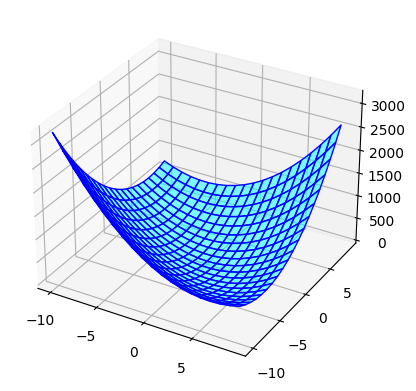

In [4]:
# this function has been prepared only for the visualization sake, no need to go through this but it renders some nice
# graphics :)
F = lambda r1, r2: (r1 * A[0, 0] + r2 * A[0, 1] - b[0]) ** 2 + (r1 * A[1, 0] + r2 * A[1,1] - b[1]) ** 2 + lmbda * (np.abs(r1) + np.abs(r2))
xx, yy = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, F(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])

ISTA with adaptive step size
----------------------------
Parameters of ISTA

In [5]:
TOL_GRAD_NORM = 1e-4
MAX_ITER = 100
TOL_DIST_X = 1e-3
# initial value for alpha
alpha = 1
# parameter for backtracking
# convergence will be faster with lower eta
eta = 0.99

Initialization: test different inizializations, the function is convex, you always converge to the same solution

In [6]:
x = np.array([random.randint(-10,10), random.randint(-10,10)])

#grad_norm = 1e10
distanceX = 1e10

# initialize the list with all the estimates
all_x = [x]
x_past = x

In [7]:
# THRESHOLDING FUNCTION
def soft_thresh(x,lmbda):
  for i in range(len(x)):
    if x[i]>lmbda:
      x[i]= x[i]-lmbda
    elif x[i]<-lmbda:
      x[i]= x[i]+lmbda
    else:
      x[i]=0
  #print("final estimate:",x)
  return x

Main loop

In [8]:
cnt = 0
alpha_current = alpha
while cnt < MAX_ITER and distanceX > TOL_DIST_X:
    # compute the argument of the proximal operator
    x_current = all_x[-1] - alpha_current * df(all_x[-1])

    # perform soft thresholding of x
    x_current = soft_thresh(x_current,lmbda)

    # iterate the backtracking procedure until the stopping criterion is met
    while F(x_current[0],x_current[1])>F(all_x[-1][0],all_x[-1][1]):
      # update alpha
        alpha_current = alpha_current * eta

        # compute again x
        x_current = all_x[-1] - alpha_current * df(all_x[-1])

        # perform soft thresholding
        x_current = soft_thresh(x_current,lmbda)

    # compute the stopping criteria
    distanceX = np.linalg.norm(x_current - all_x[-1], ord=2)

    # store the estimate
    all_x.append(x_current)

    cnt = cnt + 1

Plot all the estimates

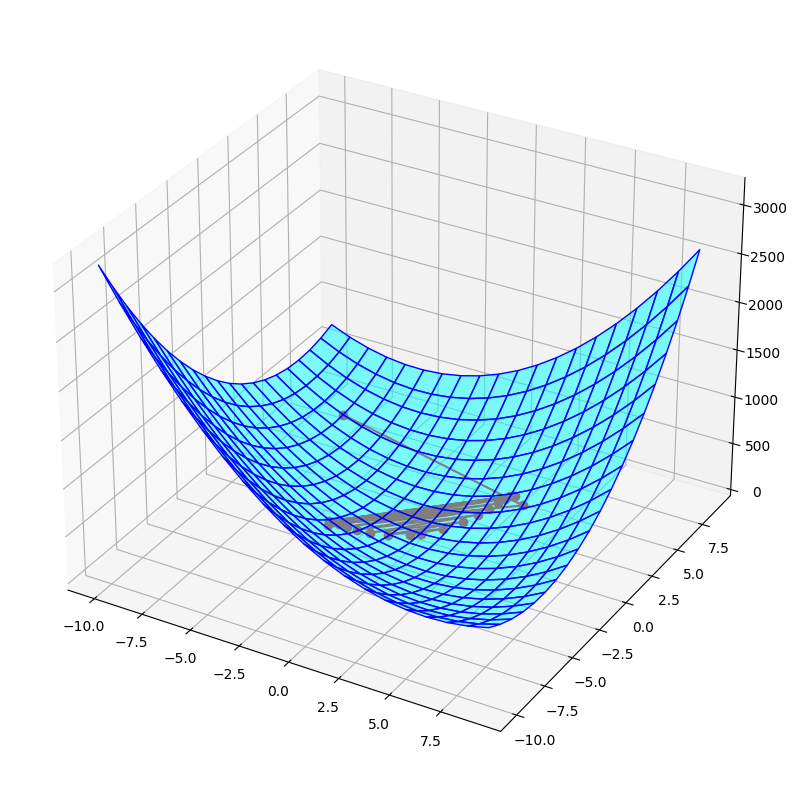

In [9]:
# plot the new estimate
xxplot = [x[0] for x in all_x]
yyplot = [x[1] for x in all_x]
zzplot = F(np.array(xxplot), np.array(yyplot))

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, F(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])
ax.plot3D(xxplot, yyplot, zzplot, 'r-o')

Compare the number of iteration needed for convergence with backtracking with the number of iteration required using the optimal alpha

In [10]:
print(f'nr of iteration of ISTA with backtracking (before stopping criteria met): {cnt}\n')
print(f'Solution of ISTA: [{x_current[0]:.4f}, {x_current[1]:.4f}]\n')
print(f'Value of the functional: {f(x_current):.4f}\n')

nr of iteration of ISTA with backtracking (before stopping criteria met): 20

Solution of ISTA: [0.0000, 0.0000]

Value of the functional: 0.0000



FISTA
-----
Parameters of FISTA

In [11]:
TOL_GRAD_NORM = 1e-4
MAX_ITER = 1e3
TOL_DIST_X = 1e-3
# set the optimal value for alpha
alpha = 1 / np.max(np.linalg.eigvals(A.T@A))

Initialization: test different inizializations, the function is convex, you always converge to the same solution

In [12]:
# initialize x
x = np.array([random.randint(-10,10), random.randint(-10,10)])

# initialize y
y = x

# initialize gamma
gamma = 1

grad_norm = 1e10
distanceX = 1e10

# initialize the list with all the estimates
all_x = [x]
all_gamma = [gamma]

Main loop

In [13]:
cnt = 0
while cnt < MAX_ITER and distanceX > TOL_DIST_X:
    # compute the argument of the proximal operator
    x = y - alpha * df(y)

    # perform soft thresholding of x
    x= soft_thresh(x,lmbda)

    # update gamma
    gamma = (1 + np.sqrt(1+all_gamma[-1]**2)) / 2

    # update y
    y = x + (all_gamma[-1]-1)/gamma * (x - all_x[-1])

    # compute the stopping criteria
    distanceX = np.sqrt( (x[0] - all_x[-1][0])**2 + (x[1] - all_x[-1][1])**2 )

    # store the estimate
    all_x.append(x)
    all_gamma.append(gamma)

    cnt = cnt + 1

Plot all the estimates

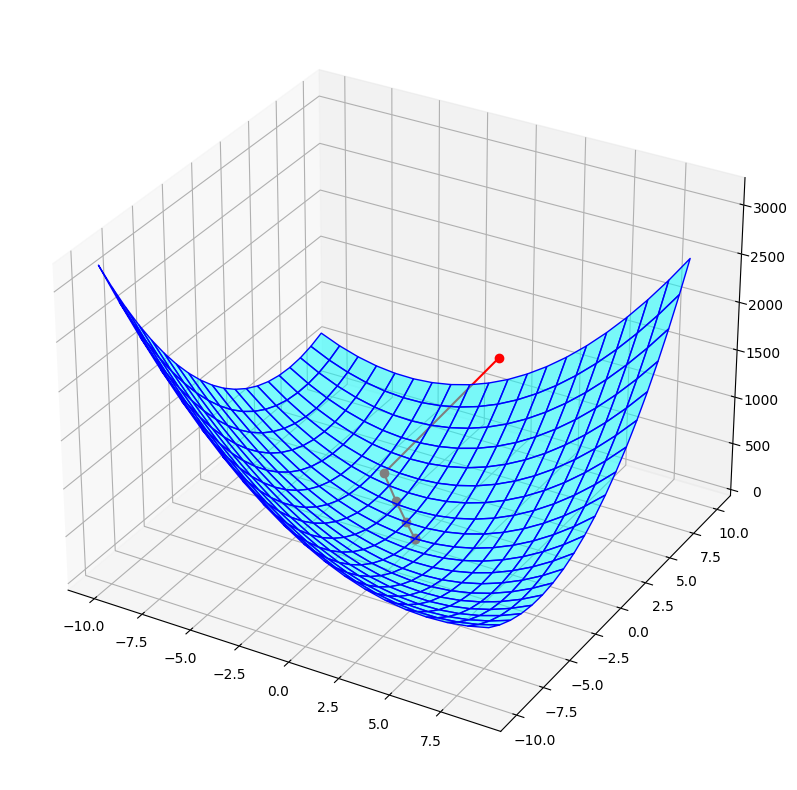

In [14]:
# plot the new estimate
xxplot = [x[0] for x in all_x]
yyplot = [x[1] for x in all_x]
zzplot = F(np.array(xxplot), np.array(yyplot))

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, F(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])
ax.plot3D(xxplot, yyplot, zzplot, 'r-o')

In [15]:
print(f'nr of iteration of FISTA (before stopping criteria met): {cnt}\n')
print(f'Solution of FISTA: [{x[0]:.4f}, {x[1]:.4f}]\n')
print(f'Value of the functional: {f(x):.4f}\n')

nr of iteration of FISTA (before stopping criteria met): 6

Solution of FISTA: [0.0000, 0.0000]

Value of the functional: 0.0000

